In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [190]:
# Load the Diabetes dataset
from sklearn import datasets
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

 ### Explore the data 

##### Below shows the scatter plot of BMI vs. Diabetes Progression

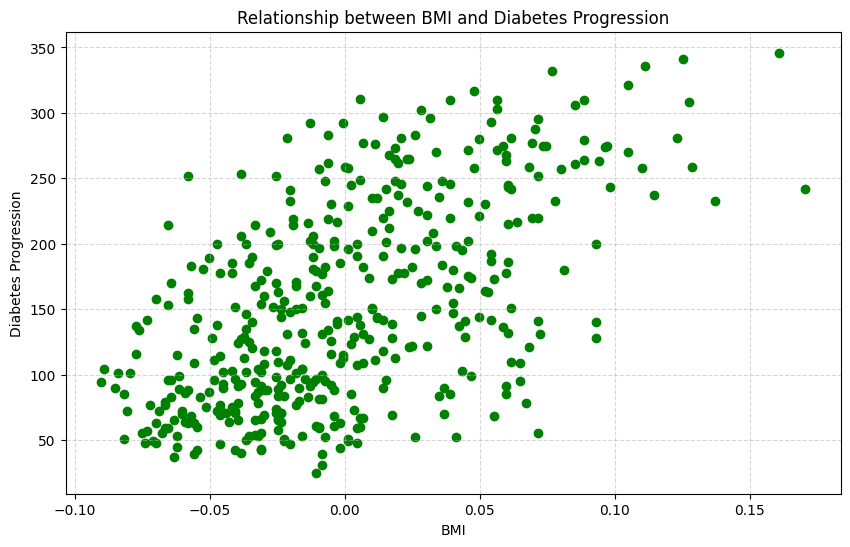

In [191]:

plt.figure(figsize=(10, 6))
plt.scatter(diabetes_X[:, 2], diabetes_y, color='green')
plt.xlabel('BMI')
plt.ylabel('Diabetes Progression')
plt.title('Relationship between BMI and Diabetes Progression')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


##### Below shows the histogram plot of BMI vs. Diabetes Progression

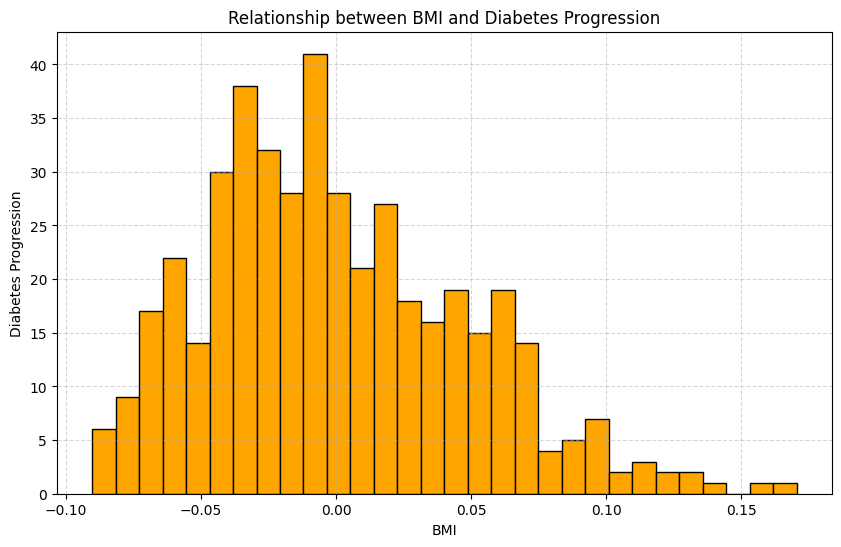

In [192]:
plt.figure(figsize=(10, 6))
plt.hist(diabetes_X[:, 2], bins=30, color='orange', edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Diabetes Progression')
plt.title('Relationship between BMI and Diabetes Progression')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Split data into Train and Test sets

We divide the dataset into training and testing sets to train the model on one set and evaluate its performance on the other. We'll use 80% of the data for training and 20% for testing.

In [193]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_X[:, np.newaxis, 2], diabetes_y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (353, 1)
Shape of X_test: (89, 1)
Shape of y_train: (353,)
Shape of y_test: (89,)


Ouput indicates that there are 353 samples in the training set and 89 samples in the testing set, with one feature (BMI) for each sample.

### Train the Linear Regression model


The purpose of training the linear regression model is to learn the relationship between body mass index (BMI) as the independent variable and the progression of diabetes as the dependent variable, allowing the model to make predictions based on new BMI values.

In [194]:
# Reshape data to 2D array
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# Create linear regression object
Regression_model = LinearRegression()

# Train the model using the training sets
Regression_model.fit(X_train, y_train)

# The coefficients
print('Slope (Coefficient):', Regression_model.coef_[0])
print('Intercept:', Regression_model.intercept_)

Slope (Coefficient): 998.5776891375593
Intercept: 152.00335421448167


The slope coefficient indicates how much the target variable (disease progression) is expected to change for a one-unit increase in the BMI feature. The intercept represents the value of the target variable (disease progression) when the BMI feature is zero. 

### Make Predictions

We use the trained model to make predictions on both the training and testing data.

In [195]:
# Make predictions using the train set
predict_y_train = Regression_model.predict(X_train)
print("Predictions for training set:\n", predict_y_train)

# Make predictions using the test set
predict_y_test  = Regression_model.predict(X_test)
print("Predictions testing set:\n", predict_y_test)

Predictions for training set:
 [164.10297141 133.96715688 201.77273956 116.74669144  86.61087692
 112.44157508 172.71320413 221.14576318 189.93366957 135.04343597
  83.38203965 171.63692504  94.14483055 256.66297315  72.61924875
 172.71320413 111.36529599 116.74669144 108.13645872 171.63692504
 178.09459958 115.67041235 194.23878593 101.67878418 207.15413501
 166.25552959 140.42483142 141.50111051 142.5773896  147.95878505
 167.33180868 175.9420414  114.59413326 119.97552871 170.56064595
 136.11971506 145.80622687 160.87413414 114.59413326 142.5773896
  74.77180693 150.11134323 107.06017963 197.4676232  184.55227412
 237.28994953 141.50111051 262.0443686  145.80622687 153.34018051
 266.34948496 111.36529599 169.48436686 211.45925137 105.98390054
 199.62018138 157.64529687 121.0518078  206.07785592 146.88250596
 142.5773896  177.01832049 280.34111313 166.25552959 151.18762232
 121.0518078  156.56901778 161.95041323 121.0518078  113.51785417
 154.4164596  126.43320325  85.53459783 112.44

### Evaluate the model

To evaluate the model performance using both the training and testing data, we use Mean Squared Error (MSE). A lower training MSE indicates that the model fits the training data well.

In [196]:
# Calculate mean squared error of train set
MSE_train = mean_squared_error(y_train, predict_y_train)
print("Mean squared error of train set:", MSE_train)

# Calculate mean squared error of test set
MSE_test = mean_squared_error(y_test, predict_y_test)
print("Mean squared error of test set:", MSE_test)

Mean squared error of train set: 3854.11265207582
Mean squared error of test set: 4061.8259284949268


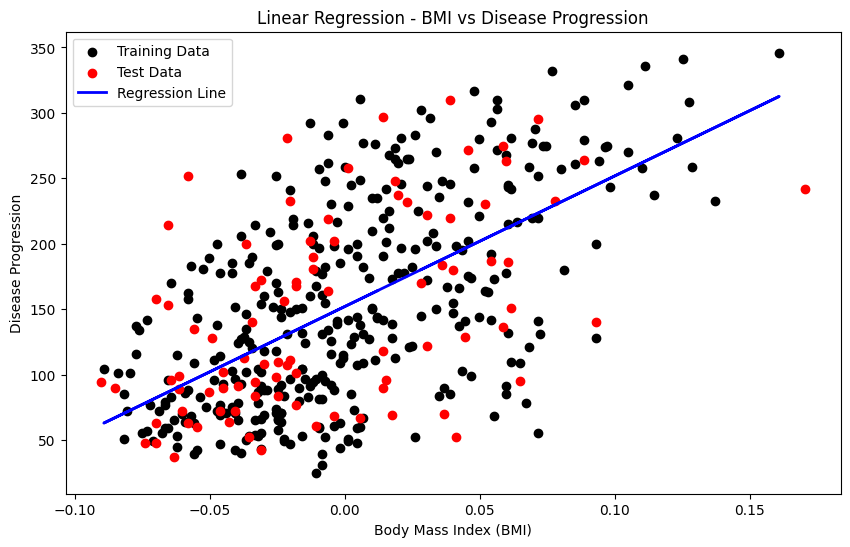

In [197]:
#Plot the  training data and the test data model
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='black', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.plot(X_train, predict_y_train, color='blue', linewidth=2, label='Regression Line')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Disease Progression')
plt.title('Linear Regression - BMI vs Disease Progression')
plt.legend()
plt.show()


Based on the final graph, the model appears to fit the training data quite well, closely following the trend of BMI's relation to disease progression. However, its performance with the testing data is less precise, indicating potential limitations in accurately predicting disease progression with new data.